# Understanding Tensors: From Foundations to Advanced Applications

Welcome to this comprehensive exploration of tensors! This notebook takes you on a journey from the basic foundations to advanced applications, helping you build both intuition and practical skills. Whether you're approaching tensors for the first time or looking to deepen your understanding, you'll find valuable insights here.

## Table of Contents
1. [Building Intuition: What Are Tensors Really?](#building-intuition)
2. [Mathematical Foundations](#mathematical-foundations)
3. [The Geometry of Tensors](#geometry)
4. [Broadcasting: Making Tensor Operations More Efficient](#broadcasting)
5. [Tensors in Practice](#practical-tensors)
6. [Advanced Operations and Decompositions](#advanced-ops)
7. [Deep Learning Applications](#deep-learning)
8. [Conclusion](#conclusion)


<a id="building-intuition"></a>
## 1. Building Intuition: What Are Tensors Really?

Before we explore the more formal aspects, let’s build some intuition about what **tensors** are and why they play a central role in modern data analysis and machine learning.

---

### 1.1 The Evolution of Numbers

Our mathematical understanding of \"numbers\" has grown progressively more sophisticated to address increasingly complex problems:

- **Scalars (Rank-0 Tensors)**  
  A single number indicating a magnitude or value.  
  $$
    \text{Example: } 5.0
  $$
  - **Real-World Analogy**: Temperature (e.g., 20°C).

- **Vectors (Rank-1 Tensors)**  
  An ordered list of numbers capturing magnitude and direction.  
  $$
    \text{Example: } [\,3,\,2,\,1\,]^\top
  $$
  - **Real-World Analogy**: Velocity in 2D or 3D space (speed plus direction).

- **Matrices (Rank-2 Tensors)**  
  A rectangular grid (2D array) of numbers.  
  $$
    \begin{bmatrix}
      1 & 2 \\
      3 & 4
    \end{bmatrix}
  $$
  - **Real-World Analogy**: A matrix can represent a transformation (like rotation or scaling) or data tables (rows × columns).

- **Tensors (Rank-N Tensors)**  
  The natural extension of these concepts into higher dimensions:  
  $$
    \mathcal{T} \in \mathbb{R}^{d_1 \times d_2 \times \cdots \times d_N}.
  $$
  - **Intuition**: When a matrix is not enough to capture all the axes of variation, we move to higher ranks.

---

### 1.2 Real-World Examples

Below are everyday scenarios where a 2D matrix simply can’t capture all required dimensions:

- **RGB Image**  
  - Three dimensions: $\text{height} \times \text{width} \times \text{color channels}$.  
  - Each pixel has separate red, green, and blue intensities.

- **Weather Data**  
  - Four dimensions: $\text{latitude} \times \text{longitude} \times \text{altitude} \times \text{time}$.  
  - Each point tracks temperature, humidity, or pressure over time.

- **Brain MRI**  
  - Four dimensions: $\text{3D space} \times \text{time}$.  
  - Multiple slices in 3D plus a time sequence capturing dynamic changes (e.g., functional MRI).

---

### 1.3 Key Questions to Ponder

1. **When is a single matrix (2D) insufficient to capture your data?**  
   Perhaps you have multiple time steps, multiple sensors, and multiple trials. Flattening these dimensions into rows/columns often loses valuable structure.

2. **How do the patterns in one dimension (e.g., space) relate to patterns in another (e.g., time)?**  
   Tensors enable natural representations of interactions among multiple modes of variation.

3. **What is the difference between calling something a \"tensor\" vs. just calling it a higher-dimensional array?**  
   - Mathematically, a tensor comes with transformation rules under a change of basis (important in physics and geometry).  
   - In computational contexts, \"tensor\" often just refers to an $N$-dimensional array plus potential additional properties.

Feel free to keep these questions in mind as we transition to more formal definitions and hands-on examples.

---

In [20]:
# (Optional) Install your requirements; adjust as needed.
!pip install matplotlib
!pip install -e ..

# Basic imports and environment setup
from DLpy.core import Tensor
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from DLpy.utils import TensorDecomposition  

# Enable inline plotting for notebooks
%matplotlib inline


Obtaining file:///C:/Users/aluja/Desktop/DLpy
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for DLpy (pyproject.toml): started
  Building editable for DLpy (pyproject.toml): finished with status 'done'
  Created wheel for DLpy: filename=DLpy-0.1.0-0.editable-py3-none-any.whl size=3594 sha256=ca9ad62c38ebc26a5aaeec2dd1ca5a03e8dec525cab5e1a342a03ba93eba71e5
  Stored in directory: C:\Users\aluja\AppData\Local\Temp\pip-ephem-wheel-cache-1xdly2iu\wheels\a7\f5\d5\aee0ab8f687ab7d807ec8c76fc89df52d79760a06a52497840
Successfully buil

<a id="mathematical-foundations"></a>
## 2. Mathematical Foundations

Mathematically, a tensor is an object that is multilinear in each of its indices. This notion generalizes the concept of vectors (linear maps from scalars) and matrices (linear maps from vectors) to higher-order domains.

---

### 2.1 From Linear to Multilinear Maps

1. **Linear Maps** (Recap)  
   A map $f(\cdot)$ from a vector space to another is **linear** if it preserves:
   1. **Addition**: $f(\mathbf{x} + \mathbf{y}) = f(\mathbf{x}) + f(\mathbf{y})$.
   2. **Scalar Multiplication**: $f(a\mathbf{x}) = a\,f(\mathbf{x})$.  

   - **Example**: Matrix multiplication $\mathbf{A}\mathbf{x}$ is linear in $\mathbf{x}$.

2. **Multilinear Maps**  
   A map of multiple vector arguments $\mathbf{x}, \mathbf{y}, \dots$ is **multilinear** if it is linear in **each argument separately**.  
   - **Example**: The dot product $(\mathbf{x}, \mathbf{y}) \mapsto \mathbf{x} \cdot \mathbf{y}$ is linear in $\mathbf{x}$ when $\mathbf{y}$ is fixed, and vice versa.

This multilinearity perspective underlies tensors: a **rank-$N$ tensor** can be viewed as a multilinear map that takes $N$ vectors as input and returns a scalar.

---

### 2.2 Tensor Rank and Shape

The **rank** of a tensor tells us the minimum number of indices needed to specify each element. Concretely:
- A **scalar** has no indices (rank 0).
- A **vector** has exactly one index (rank 1).
- A **matrix** has two indices (rank 2).
- A **3D cube** or higher need three or more indices (rank 3, rank 4, etc.).

Let’s see this in code:

Scalar shape: ()
Vector shape: (3,)
Matrix shape: (2, 2)
Cube shape:   (2, 2, 2)


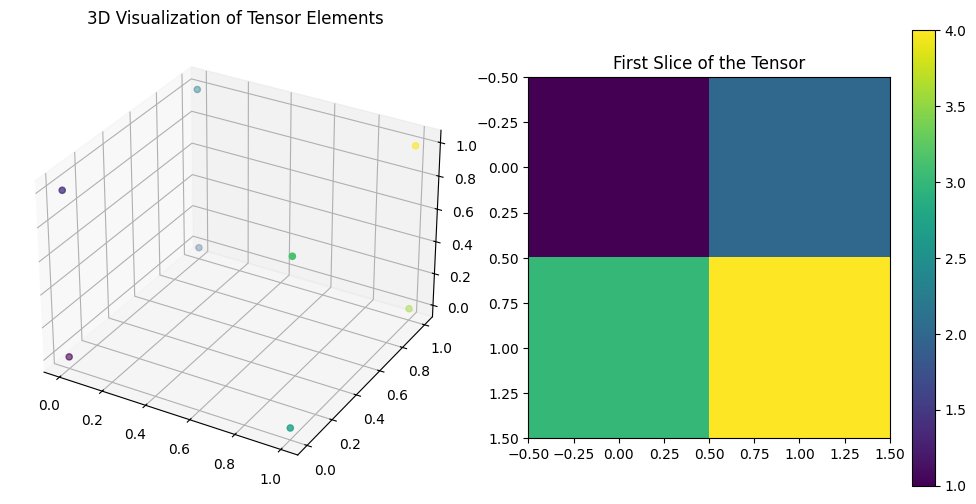

In [21]:
# Demonstrating different tensor ranks with our custom Tensor class

scalar = Tensor(5.0)                        # Rank 0
vector = Tensor([1, 2, 3])                  # Rank 1
matrix = Tensor([[1, 2], [3, 4]])           # Rank 2
cube = Tensor([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]]
])                                          # Rank 3

print(f"Scalar shape: {scalar.shape}")
print(f"Vector shape: {vector.shape}")
print(f"Matrix shape: {matrix.shape}")
print(f"Cube shape:   {cube.shape}")

# Let's visualize the 3D (rank-3) tensor a bit
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

x, y, z = np.indices(cube.shape)
ax1.scatter(
    x.flatten(), y.flatten(), z.flatten(), 
    c=cube.numpy().flatten(), cmap='viridis'
)
ax1.set_title("3D Visualization of Tensor Elements")

# Show the first 2D slice
im = ax2.imshow(cube[0].numpy(), cmap='viridis')
ax2.set_title("First Slice of the Tensor")
plt.colorbar(im, ax=ax2)
plt.tight_layout()
plt.show()

### 2.3 Key Takeaways
- Tensors generalize vectors and matrices to higher dimensions.
- Multilinearity is at the heart of tensor definitions (important in advanced topics like tensor calculus).
- Shape and rank quickly tell us how many dimensions a tensor has and how those dimensions are sized.

<a id="broadcasting"></a>
## 3 Broadcasting: Making Tensor Operations More Efficient

Imagine you want to normalize a batch of data by subtracting the mean from each feature. Without broadcasting, you'd need to manually repeat the mean values for each sample in your batch. Let's see this problem in practice:

In [22]:
# Without broadcasting - the manual way
batch = Tensor([[1, 2, 3],
                [4, 5, 6]])  # Shape: (2, 3)
means = Tensor([0.5, 1.0, 1.5])  # Shape: (3,)

# We'd need to manually repeat the means
means_repeated = Tensor([[0.5, 1.0, 1.5],
                        [0.5, 1.0, 1.5]])  # Explicitly copied for each sample
normalized = batch - means_repeated

print("Manual normalization result:")
print(normalized.numpy())

Manual normalization result:
[[0.5 1.  1.5]
 [3.5 4.  4.5]]


This approach is cumbersome and inefficient. Broadcasting solves this elegantly by automatically handling the shape differences:

In [23]:
# With broadcasting - clean and efficient
normalized = batch - means  # means automatically expands to match batch shape
print("\nBroadcasted normalization result:")
print(normalized.numpy())


Broadcasted normalization result:
[[0.5 1.  1.5]
 [3.5 4.  4.5]]


How does broadcasting know what to do? It follows three simple rules:

- Start from the right: Compare dimensions right-to-left
- Dimensions must be compatible: They must be equal or one must be 1
- Missing dimensions are treated as 1: Smaller tensors get new dimensions

Let's see these rules in action with a simple example:

In [24]:
matrix = Tensor([[1, 2, 3],
                [4, 5, 6]])     # Shape: (2, 3)
vector = Tensor([10, 20, 30])   # Shape: (3,)

# Broadcasting happens automatically
result = matrix + vector
print("Original matrix:\n", matrix.numpy())
print("\nBroadcasted result:\n", result.numpy())

Original matrix:
 [[1 2 3]
 [4 5 6]]

Broadcasted result:
 [[11 22 33]
 [14 25 36]]


Broadcasting appears frequently in deep learning operations. Here's a common example from a neural network layer:

In [25]:
# Adding bias to layer outputs
layer_output = Tensor([[2, 3],
                      [4, 5]])    # Shape: (2, 2)
bias = Tensor([0.1, 0.2])        # Shape: (2,)
result = layer_output + bias      # bias broadcasts to each sample

print("Layer output with bias:")
print(result.numpy())

Layer output with bias:
[[2.1 3.2]
 [4.1 5.2]]


This mechanism brings several benefits:

- Cleaner, more readable code
- Better memory efficiency since we don't create unnecessary copies
- Improved performance through optimized operations

However, we need to be careful about:

- Making sure our intended operation matches what broadcasting will do
- Checking shape compatibility to avoid subtle bugs
- Being aware of memory usage in very large operations

In the next section, we'll see how these broadcasting concepts combine with geometric transformations to enable powerful tensor operations.

<a id="geometry"></a>
## 4. The Geometry of Tensors

In addition to being multi-dimensional arrays, **tensors** can be viewed as geometric objects that describe how vectors (and higher-dimensional structures) transform under linear and multilinear maps. This viewpoint is crucial in fields like computer graphics, robotics (forward kinematics), physics (relativity, continuum mechanics), and more.

---

### 4.1 Tensors as Geometric Objects

1. **Rank-1 Tensors: Vectors**  
   - A vector $\mathbf{v}$ in $\mathbb{R}^n$ can be interpreted as an \"arrow\" in $n$-dimensional space.  
   - Geometrically, it indicates both **direction** and **magnitude**.

2. **Rank-2 Tensors: Linear Transformations**  
   - A matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$ can represent a linear map $f : \mathbb{R}^n \to \mathbb{R}^n$.  
   - **Examples**: Rotation, scaling, shear, reflection.  

3. **Rank-$N$ Tensors: Higher-Order Structures**  
   - Higher-rank tensors can act on multiple vector inputs. They can describe more complex phenomena—like stress and strain in continuum mechanics, or curvature in differential geometry.

#### Why Think Geometrically?
Seeing tensors as maps or transformations can help you:
- Identify **how** a transformation reshapes space (compression, expansion, shear).
- Understand **invariants** (e.g., angles, lengths, volumes) and what properties are preserved.

---

### 4.2 Visualizing Tensor Operations in 2D

Even focusing on rank-2 tensors (matrices) is instructive. Below, we illustrate how certain 2D transformations affect a grid of points and the standard basis vectors:

1. **Scaling** – stretches/compresses each axis.
2. **Rotation** – rotates all points around the origin.
3. **Shear** – slides one axis relative to another.

---

Scaling Transformation:


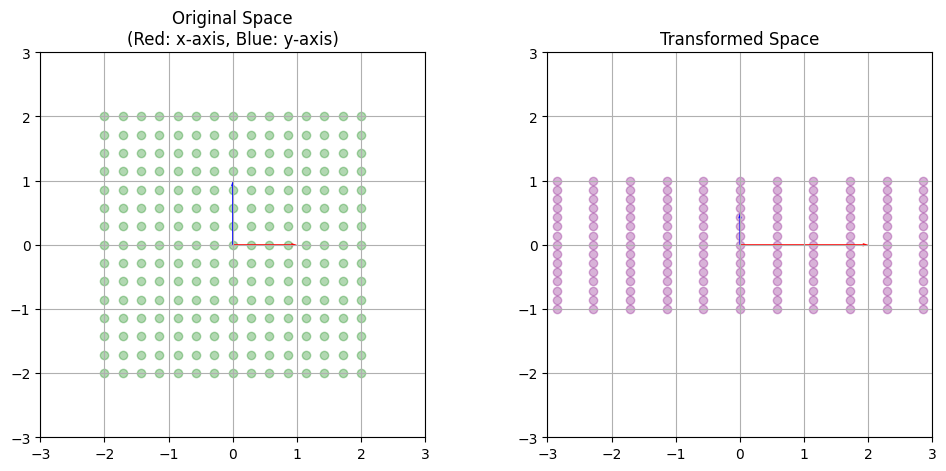

Rotation Transformation:


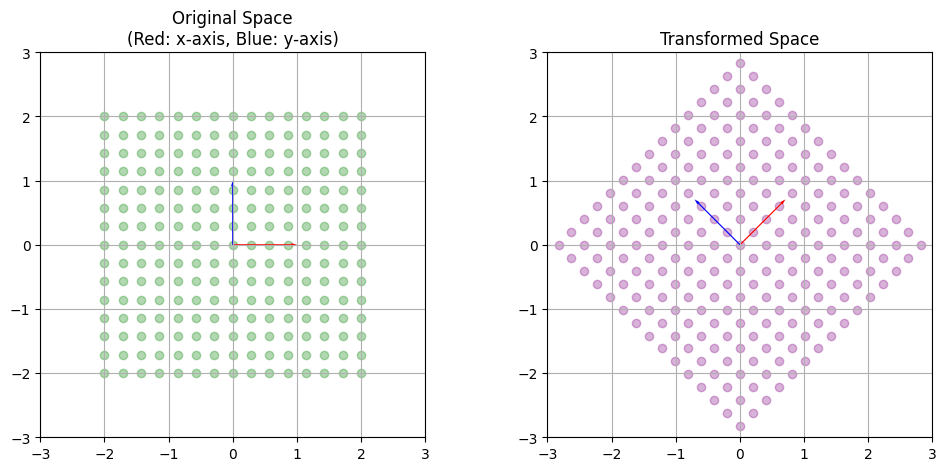

Shear Transformation:


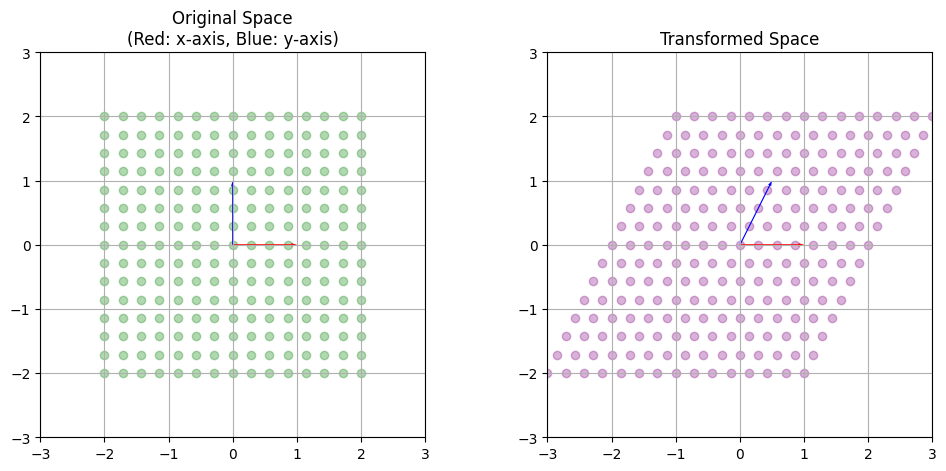

In [26]:
def visualize_transformation(tensor, points):
    """
    Visualize how a 2D rank-2 tensor (matrix) transforms a cloud of points.
    
    Args:
        tensor (Tensor): A rank-2 Tensor or NumPy array representing a 2D transformation.
        points (np.ndarray): Nx2 array of (x, y) points to visualize.
    """
    # Convert to NumPy if using custom Tensor class
    matrix = tensor.numpy() if hasattr(tensor, 'numpy') else tensor

    # Apply the transformation to all points
    transformed = points @ matrix.T  # or matrix @ points.T if shapes differ

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # 1) Original space
    ax1.scatter(points[:, 0], points[:, 1], alpha=0.3, c='green')
    ax1.quiver(0, 0, 1, 0, color='r', scale=1, angles='xy', scale_units='xy', width=0.003)
    ax1.quiver(0, 0, 0, 1, color='b', scale=1, angles='xy', scale_units='xy', width=0.003)
    ax1.set_title("Original Space\n(Red: x-axis, Blue: y-axis)")
    ax1.set_aspect('equal', 'box')
    ax1.axis([-3, 3, -3, 3])
    ax1.grid(True)

    # 2) Transformed space
    ax2.scatter(transformed[:, 0], transformed[:, 1], alpha=0.3, c='purple')
    # Transform basis vectors
    basis_x = matrix @ np.array([1, 0])
    basis_y = matrix @ np.array([0, 1])
    ax2.quiver(0, 0, basis_x[0], basis_x[1], color='r', scale=1, angles='xy', scale_units='xy', width=0.003)
    ax2.quiver(0, 0, basis_y[0], basis_y[1], color='b', scale=1, angles='xy', scale_units='xy', width=0.003)
    ax2.set_title("Transformed Space")
    ax2.set_aspect('equal', 'box')
    ax2.axis([-3, 3, -3, 3])
    ax2.grid(True)

    plt.show()

# Create a grid of points covering -2 to 2 in both x and y
n_points = 15
xs = np.linspace(-2, 2, n_points)
ys = np.linspace(-2, 2, n_points)
xv, yv = np.meshgrid(xs, ys)
points = np.stack([xv.flatten(), yv.flatten()], axis=1)

# Example transformations
from DLpy.core import Tensor

scaling = Tensor([[2, 0],
                  [0, 0.5]])  # More dramatic scaling
rotation = Tensor([[0.707, -0.707],
                   [0.707,  0.707]])  # 45° rotation (approx.)
shear = Tensor([[1, 0.5],
                [0,   1.0]])  # Shear along x-axis

print("Scaling Transformation:")
visualize_transformation(scaling, points)

print("Rotation Transformation:")
visualize_transformation(rotation, points)

print("Shear Transformation:")
visualize_transformation(shear, points)

#### Observations
- **Scaling** stretches the $x$-axis by a factor of 2 and compresses the $y$-axis by 0.5.
- **Rotation** reorients all points around the origin without changing distances from the origin.
- **Shear** slides one axis relative to the other (the shape looks slanted).

---

### 4.3 Tensor Transformations in Higher Dimensions

While the 2D case is easiest to visualize:
- **3D transformations** act on $\mathbb{R}^3$. You might rotate an object around an axis, scale differently along $x, y, z$, or apply more complex transformations.
- **Rank-$N$** tensors can be seen as multilinear maps on $N$ vector spaces simultaneously. Although they become harder to visualize, the same principles of linearity (or multilinearity) apply.

---

### 4.4 Key Takeaways

- **Linear/Multilinear Map Interpretation**: Seeing a tensor as a transformation helps you predict how it modifies shapes, sizes, or directions in space.  
- **Basis Vectors Under Transformation**: A rank-2 tensor (matrix) completely determines how space is transformed by how it sends the standard basis vectors.  
- **Geometric Insight**: Understanding invariants (e.g., volume, orientation) becomes easier when looking at transformations.

This **geometric lens** on tensors unifies linear algebra, machine learning, and applied fields like robotics, ultimately helping to recognize the power of tensors in describing how data or objects move, stretch, and rotate in higher-dimensional spaces.

---

<a id="practical-tensors"></a>
## 5. Tensors in Practice

Thus far, we've established the conceptual and mathematical underpinnings of tensors. Now let's see how **tensor operations** appear in everyday tasks such as image processing. Tensors naturally arise whenever data has more than two dimensions, such as in images ($\text{height} \times \text{width} \times \text{channels}$).

---

### 5.1 Illustrative Example: Image Tensors

Consider a color image in **RGB** format:
- **Height** (e.g., 128 pixels)
- **Width** (e.g., 128 pixels)
- **Channels** (3: Red, Green, Blue)

This naturally forms a 3D tensor:  
$$
  \mathcal{I} \in \mathbb{R}^{\text{height} \times \text{width} \times 3}.
$$

Below, we:
1. **Create** a synthetic image (tensor) with distinct features in each channel.  
2. **Apply** transformations—(a) **gamma correction** for brightness changes, and (b) a **sepia filter** (using matrix multiplication).  
3. **Visualize** the results to see how these operations manifest in each channel.

---

### 5.2 Creating a Didactic 3D Tensor

In [27]:
def create_didactic_tensor(size: int = 128) -> np.ndarray:
    """
    Creates a 3D tensor (image) with distinct features in each channel to illustrate tensor operations.
    
    The output is shape (size, size, 3), akin to an RGB image.
    
    - Red channel:   A smooth horizontal gradient (left to right).
    - Green channel: A circle in the center (demonstrates geometric patterns).
    - Blue channel:  Vertical stripes, illustrating discrete periodic patterns.
    
    Args:
        size (int): Width and height of the square image (default: 128).
    
    Returns:
        np.ndarray: A 3D tensor of shape (size, size, 3), values normalized to [0, 1].
    """
    # Initialize empty image tensor
    image = np.zeros((size, size, 3), dtype=float)

    # 1) Red channel: Horizontal gradient
    #    Creates a gradient from 0 to 1 across the width of the image
    image[:, :, 0] = np.linspace(0, 1, size).reshape(1, -1)

    # 2) Green channel: Central circle
    #    We use numpy's ogrid or meshgrid to define a circular region
    y, x = np.ogrid[:size, :size]
    center = size / 2
    radius = size / 4
    mask = (x - center)**2 + (y - center)**2 <= radius**2
    image[mask, 1] = 0.8  # Fill circle with a bright greenish tone

    # 3) Blue channel: Vertical stripes every N pixels
    stripe_step = 20
    image[:, ::stripe_step, 2] = 0.7

    return image

**Key Observations**:
- **Channel Separation**: Each color channel is manipulated independently, illustrating how multi-dimensional data (tensors) can be partially processed channel by channel.
- **Element-Wise Operations**: Setting `image[mask, 1] = 0.8` modifies just the green channel inside a circle.

---

### 5.3 Applying Transformations

We now apply two transformations to highlight different tensor operations:

1. **Gamma Correction (Brightness Adjustment)**  
   - We use `pixel_value ** 0.4` to make darker regions lighter.  
   - This is an **element-wise** operation performed independently on each pixel.

2. **Sepia Filter (Color Transformation)**  
   - We reshape each $(\text{height}, \text{width}, 3)$ image to $(\text{height}*\text{width}, 3)$ for matrix multiplication.  
   - We multiply by a **3×3 matrix** (for RGB → new RGB) and then reshape back.

In [28]:
def apply_transformations(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Applies two different tensor transformations to demonstrate common operations.

    1) Gamma-based brightness adjustment (element-wise power).
    2) Sepia filter (matrix multiplication on color channels).

    Args:
        image (np.ndarray): Input tensor of shape (H, W, 3).
    
    Returns:
        Tuple[np.ndarray, np.ndarray]:
            - brighter: Brightness-adjusted image.
            - sepia:    Sepia-toned image.
    """
    # =======================
    # 1) Brightness (Gamma)
    # =======================
    # Exponent < 1 brightens dark regions
    gamma_exponent = 0.4
    brighter = image ** gamma_exponent
    brighter = np.clip(brighter, 0, 1)  # ensure valid [0,1] after exponent

    # ==============================
    # 2) Sepia via Matrix Multiply
    # ==============================
    # Reshape image => (H*W, 3)
    pixels = image.reshape(-1, 3)

    # A commonly used sepia transformation matrix, with slight boost for effect
    sepia_matrix = np.array([
        [0.393, 0.769, 0.189],  # Red channel coefficients
        [0.349, 0.686, 0.168],  # Green channel coefficients
        [0.272, 0.534, 0.131]   # Blue channel coefficients
    ]) * 1.2  # slight intensification factor

    # Transform each pixel (3D -> 3D color transform)
    sepia_pixels = pixels @ sepia_matrix.T

    # Normalize to [0,1]
    sepia_pixels -= sepia_pixels.min()
    sepia_pixels /= max(sepia_pixels.max(), 1e-8)

    # Reshape back to (H, W, 3)
    sepia = sepia_pixels.reshape(image.shape)
    sepia = np.clip(sepia, 0, 1)

    return brighter, sepia


**Takeaways**:
- **Element-Wise vs. Matrix**: Some operations apply per-pixel (like gamma), while others use matrix multiplication to mix channels.
- **Reshaping**: We often flatten and unflatten tensors to facilitate linear algebra operations.

---

### 5.4 Visualizing the Results

To underscore how these transformations affect each color channel, we plot:
1. The **original** tensor (image).  
2. The **brightness-adjusted** version.  
3. The **sepia-toned** version.  
4. **Individual channels** to show how each slice (R, G, B) looks.

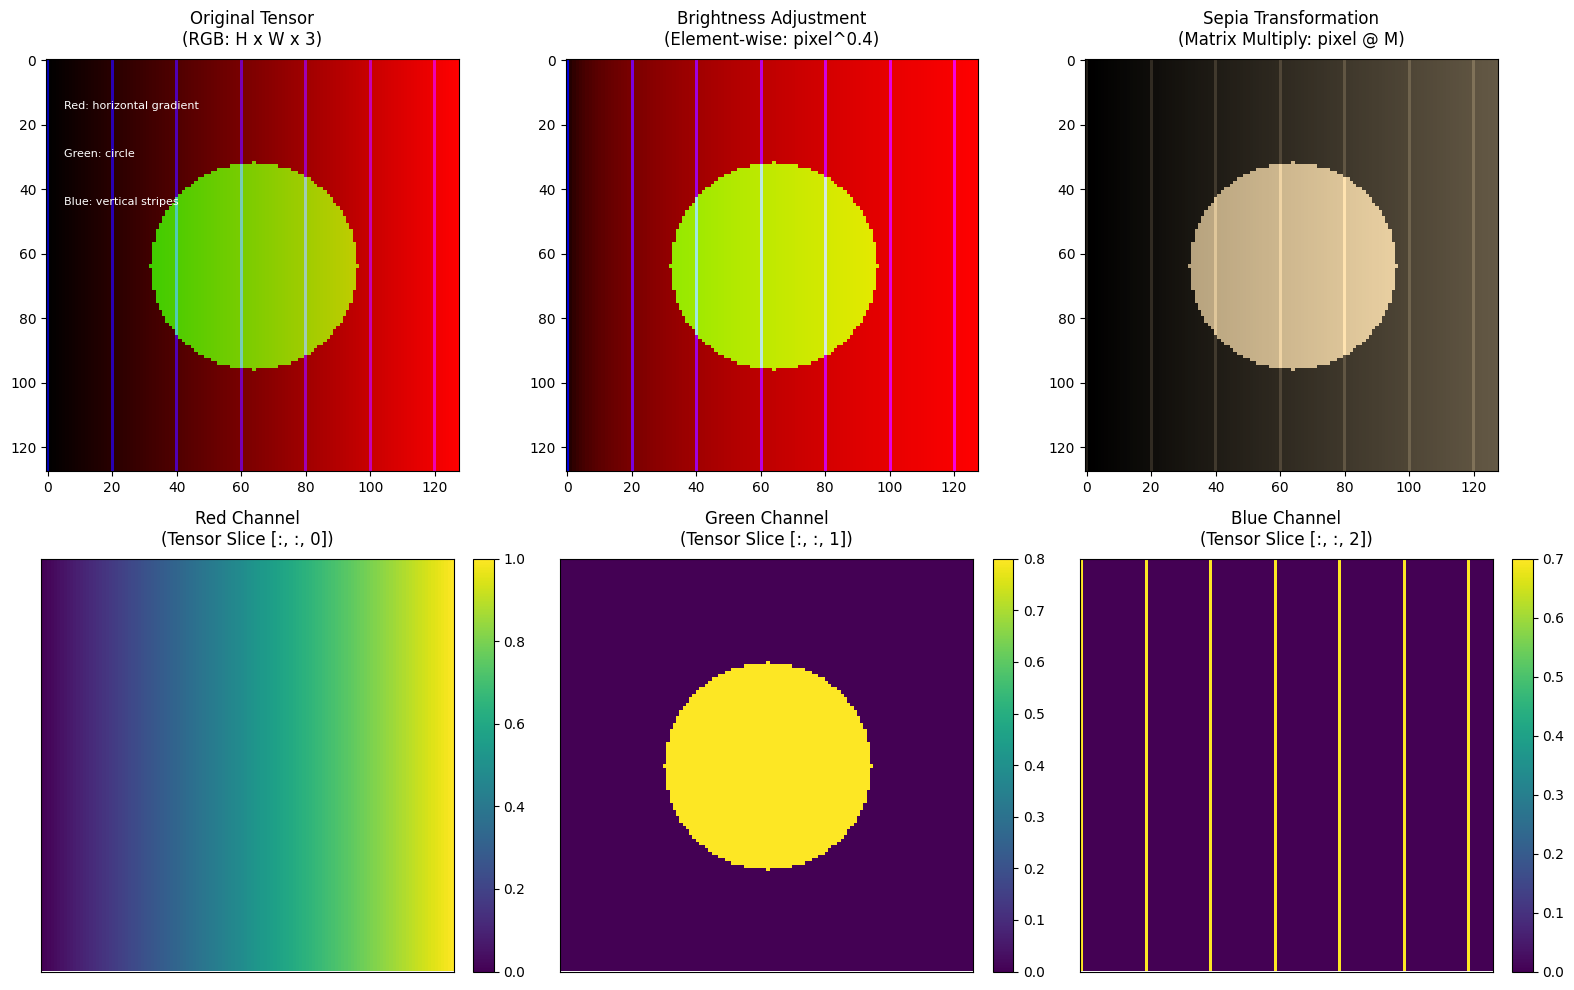

In [29]:
def create_educational_figure(image: np.ndarray, brighter: np.ndarray, sepia: np.ndarray) -> None:
    """
    Creates a multi-panel figure illustrating the original tensor, its transformations,
    and individual channel breakdowns.

    Args:
        image (np.ndarray): Original tensor, shape (H, W, 3).
        brighter (np.ndarray): Tensor after brightness adjustment.
        sepia (np.ndarray): Tensor after sepia color transform.
    """
    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace=0.4)

    # ---------------------------
    # 1) Original Image
    # ---------------------------
    ax1 = fig.add_subplot(231)
    ax1.imshow(image)
    ax1.set_title("Original Tensor\n(RGB: H x W x 3)", pad=10)
    ax1.text(5, 15, "Red: horizontal gradient", color="white", fontsize=8)
    ax1.text(5, 30, "Green: circle", color="white", fontsize=8)
    ax1.text(5, 45, "Blue: vertical stripes", color="white", fontsize=8)

    # ---------------------------
    # 2) Brightness Adjustment
    # ---------------------------
    ax2 = fig.add_subplot(232)
    ax2.imshow(brighter)
    ax2.set_title("Brightness Adjustment\n(Element-wise: pixel^0.4)", pad=10)

    # ---------------------------
    # 3) Sepia Transform
    # ---------------------------
    ax3 = fig.add_subplot(233)
    ax3.imshow(sepia)
    ax3.set_title("Sepia Transformation\n(Matrix Multiply: pixel @ M)", pad=10)

    # ---------------------------
    # 4) Individual Channels
    # ---------------------------
    channel_names = ["Red Channel", "Green Channel", "Blue Channel"]
    for i, name in enumerate(channel_names):
        ax = fig.add_subplot(234 + i)

        # Create a grayscale image focusing on one channel
        channel_img = np.zeros_like(image)
        channel_img[:, :, i] = image[:, :, i]

        im = ax.imshow(channel_img[:, :, i], cmap="viridis")
        ax.set_title(f"{name}\n(Tensor Slice [:, :, {i}])", pad=10)
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

# ================
# Putting it All Together
# ================
image = create_didactic_tensor()
brighter, sepia = apply_transformations(image)
create_educational_figure(image, brighter, sepia)


**Result**: You should see:
- The **original** pattern with each color channel demonstrating a unique feature.  
- The **gamma-corrected** image appears brighter, particularly in darker regions.  
- The **sepia** image has warm tones, created by mixing the color channels via matrix multiplication.  
- The **channel breakdown** clarifies how each slice in the 3D tensor contributes to the final visualization.

---

### 5.5 Common Misconceptions

1. **\"Tensors are just arrays.\"**  
   - While we *store* tensors as arrays in code, *mathematically* they have transformation properties that generalize linear algebra to higher dimensions.

2. **\"3D Tensors must be images.\"**  
   - Images are just one example. Tensors of shape $(I, J, K)$ appear in numerous contexts (e.g., spatio-temporal data, physical simulations).

3. **\"You can manipulate color channels only by direct indexing.\"**  
   - We often do, but more complex color transformations rely on linear algebra (e.g., color space conversions like RGB → YCbCr → HSV, etc.).

---

### 5.6 Summary

In this section, we’ve seen how **tensor operations**:
- Represent real-world data: e.g., a 2D image with multiple color channels.  
- Facilitate transformations: from element-wise *gamma* to matrix-based *sepia*.  
- Can be visualized channel by channel to grasp the underlying structure.



### Common Misconceptions ⚠️

1. **"Tensors are just arrays"**
   - While tensors can be represented as arrays, they're mathematical objects with specific transformation properties
   - The array representation depends on the chosen basis

2. **"Tensor rank means importance"**
   - Rank refers to the number of indices, not importance or magnitude
   - A rank-1 tensor isn't "less important" than a rank-2 tensor

3. **"Higher rank tensors are always better"**
   - The appropriate tensor rank depends on your problem
   - Sometimes a vector (rank-1) is exactly what you need

<a id="advanced-ops"></a>
## 6. Advanced Operations and Decompositions

Decomposing tensors into simpler components can reveal hidden patterns, reduce dimensionality, and aid in efficient computation. While matrices (2D tensors) commonly use methods like SVD or eigendecomposition, higher-order data requires higher-order decompositions.

### 6.1 Why Decompose Tensors?

Modern data often exceeds two dimensions:
- Images with multiple color channels
- Spatio-temporal data (e.g., latitude × longitude × altitude × time)
- Higher-order data in recommender systems or EEG signals

In these scenarios, **tensor decompositions** generalize the familiar matrix factorization methods to higher dimensions. Two widely used decompositions are:

1. **CP (CANDECOMP/PARAFAC) Decomposition**  
   - Expresses a tensor as a sum of rank-1 outer products:  
     $$
       \mathcal{X} \approx \sum_{r=1}^{R} a_r \circ b_r \circ c_r \,\cdots
     $$  
   - Each factor matrix (e.g., $A, B, C,\dots$) captures how the components vary along one mode of the tensor.  
   - CP is often used for multi-way data analysis and is conceptually analogous to PCA for higher-order data.

2. **Tucker Decomposition**  
   - Generalizes matrix SVD:  
     $$
       \mathcal{X} \approx \mathcal{G} \times_1 U^{(1)} \times_2 U^{(2)} \times_3 U^{(3)} \cdots
     $$  
   - Produces a smaller **core tensor** $\mathcal{G}$ and factor matrices $U^{(1)}, U^{(2)}, \dots$.  
   - More flexible than CP but can require more parameters. Tucker is similar to a higher-order SVD.

---

### 6.2 Practical Considerations

1. **Rank Selection**  
   - The rank $R$ (or multi-rank in the Tucker case) controls model complexity.  
   - Underfitting (too low a rank) yields poor approximations, while overfitting (too high) can capture noise.

2. **Initialization and Convergence**  
   - Random or SVD-based (HOSVD) initializations are common.  
   - Tensor decomposition problems are often non-convex and can converge to local minima. Multiple restarts can help.

3. **Interpretability**  
   - Each factor matrix can be interpreted as a \"profile\" across one mode (dimension) of the data.  
   - In CP, each component is a rank-1 outer product, making interpretation straightforward but limiting flexibility.  
   - In Tucker, the core tensor shows interactions among components in different modes.

4. **Efficiency**  
   - Tensor sizes can grow exponentially with the number of dimensions, so decompositions can be large-scale tasks.  
   - Efficient libraries (with GPU support) or compression strategies (e.g., Tensor Train, Hierarchical Tucker) are often needed in practice.

---

### 6.3 Demonstration: CP and Tucker Decompositions

Below we construct a synthetic 3D tensor with known low-rank structure, then demonstrate both a CP decomposition and a Tucker decomposition.  


Created synthetic tensor with shape: (6, 6, 6)

Performing CP decomposition...


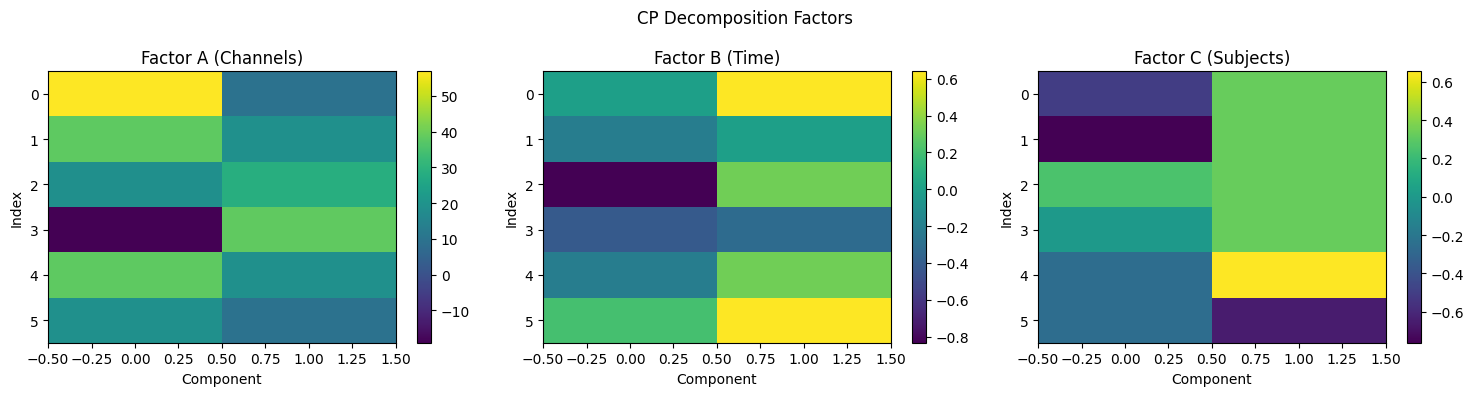


Performing Tucker decomposition...


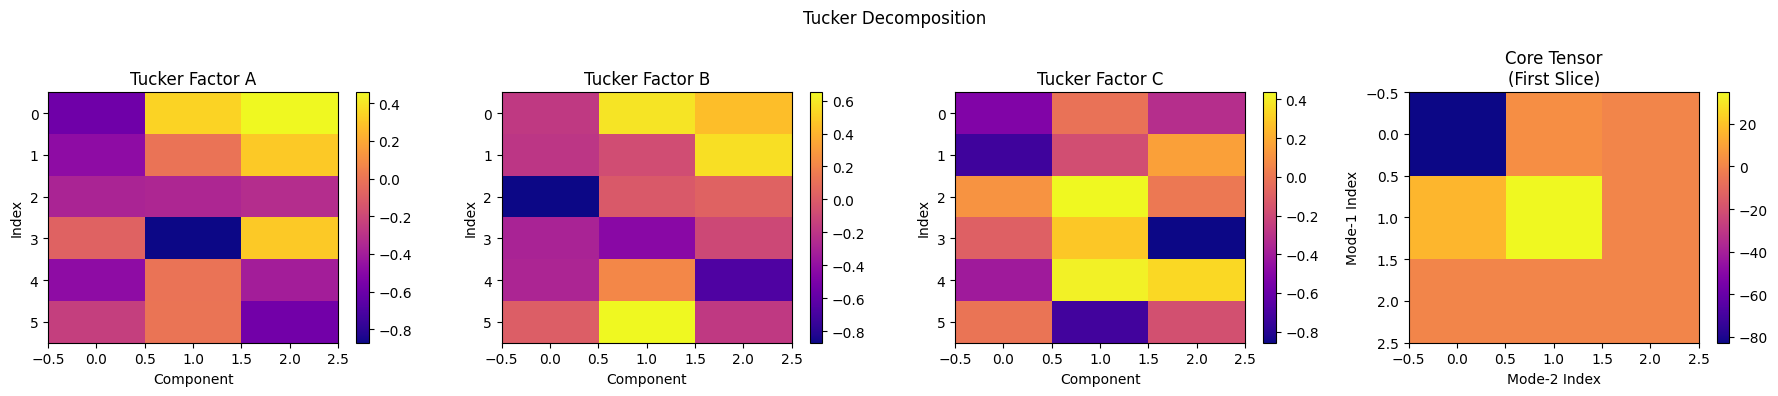

CP factors shapes: [(6, 2), (6, 2), (6, 2)]
Tucker factors shapes: [(6, 3), (6, 3), (6, 3)]
Tucker core shape: (3, 3, 3)

CP relative reconstruction error: 0.006757
Tucker relative reconstruction error: 0.006090


In [30]:
def create_synthetic_tensor(I: int = 6, J: int = 6, K: int = 6, R: int = 2, noise_level: float = 0.05) -> Tensor:
    """
    Create a synthetic 3D tensor with known structure for testing decompositions.
    
    Args:
        I, J, K: Dimensions of the tensor
        R: True rank for CP decomposition
        noise_level: Amount of Gaussian noise to add
    
    Returns:
        Tensor: Constructed tensor with known structure
    """
    # Create factor matrices for CP ground truth
    A_true = np.array([
        [1,  3],
        [2,  2],
        [3,  1],
        [4, -1],
        [2,  2],
        [1,  1]
    ], dtype=float)  # shape (I,R)

    B_true = np.array([
        [2,   0],
        [0,   1],
        [1,   4],
        [-1,  2],
        [ 1,  1],
        [ 2, -1]
    ], dtype=float)  # shape (J,R)

    C_true = np.array([
        [ 1,  2],
        [ 1,  3],
        [ 1, -1],
        [ 1,  0],
        [ 2,  1],
        [-2,  1]
    ], dtype=float)  # shape (K,R)

    # Construct the low-rank tensor
    synthetic_data = np.zeros((I, J, K), dtype=float)
    for r in range(R):
        # Compute outer product for each rank-1 component
        component = np.einsum('i,j,k->ijk', 
                            A_true[:, r], 
                            B_true[:, r], 
                            C_true[:, r])
        synthetic_data += component
    
    # Add noise
    synthetic_data += noise_level * np.random.randn(I, J, K)
    
    # Wrap in Tensor class
    return Tensor(synthetic_data, requires_grad=False)

def visualize_cp_factors(factors: List[Tensor], titles: List[str]) -> None:
    """
    Visualize the CP decomposition factors.
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    for i, (factor, title) in enumerate(zip(factors, titles)):
        data = factor.numpy()
        # Ensure factor is in (dimension × rank) format
        if data.shape[0] < data.shape[1]:
            data = data.T
            
        im = axes[i].imshow(data, aspect='auto', cmap='viridis')
        axes[i].set_title(title)
        axes[i].set_xlabel("Component")
        axes[i].set_ylabel("Index")
        plt.colorbar(im, ax=axes[i])
    
    plt.suptitle("CP Decomposition Factors")
    plt.tight_layout()
    plt.show()

def visualize_tucker_results(core: Tensor, factors: List[Tensor]) -> None:
    """
    Visualize Tucker decomposition results including factors and core tensor slice.
    """
    fig, axes = plt.subplots(1, 4, figsize=(18, 4))
    factor_titles = ["Tucker Factor A", "Tucker Factor B", "Tucker Factor C"]
    
    # Plot factors
    for i, (factor, title) in enumerate(zip(factors, factor_titles)):
        data = factor.numpy()
        if data.shape[0] < data.shape[1]:
            data = data.T
        im = axes[i].imshow(data, aspect='auto', cmap='plasma')
        axes[i].set_title(title)
        axes[i].set_xlabel("Component")
        axes[i].set_ylabel("Index")
        plt.colorbar(im, ax=axes[i])
    
    # Plot first slice of core tensor
    core_data = core.numpy()
    im_core = axes[-1].imshow(core_data[:, :, 0], aspect='auto', cmap='plasma')
    axes[-1].set_title("Core Tensor\n(First Slice)")
    axes[-1].set_xlabel("Mode-2 Index")
    axes[-1].set_ylabel("Mode-1 Index")
    plt.colorbar(im_core, ax=axes[-1])
    
    plt.suptitle("Tucker Decomposition")
    plt.tight_layout()
    plt.show()

# Create synthetic tensor
X = create_synthetic_tensor()
print("Created synthetic tensor with shape:", X.shape)

# Initialize decomposer
decomposer = TensorDecomposition(X)

# 1. CP Decomposition
print("\nPerforming CP decomposition...")
cp_factors = decomposer.cp_decomposition(
    rank=2,
    max_iter=200,
    tol=1e-7,
    n_restarts=3,
    init='hosvd'
)

# Visualize CP results
visualize_cp_factors(
    cp_factors,
    ["Factor A (Channels)", "Factor B (Time)", "Factor C (Subjects)"]
)

# 2. Tucker Decomposition
print("\nPerforming Tucker decomposition...")
tucker_core, tucker_factors = decomposer.tucker_decomposition(
    ranks=[3, 3, 3]  # Slightly higher ranks might help
)

# Visualize Tucker results
visualize_tucker_results(tucker_core, tucker_factors)

# Add after decompositions
print("CP factors shapes:", [f.shape for f in cp_factors])
print("Tucker factors shapes:", [f.shape for f in tucker_factors])
print("Tucker core shape:", tucker_core.shape)

# Optional: Compute reconstruction errors
original = X.numpy()

# CP reconstruction error
cp_reconstruction = decomposer.reconstruct_cp(cp_factors).numpy()
cp_error = np.linalg.norm(original - cp_reconstruction) / np.linalg.norm(original)
print(f"\nCP relative reconstruction error: {cp_error:.6f}")

# Tucker reconstruction error
tucker_reconstruction = decomposer.reconstruct_tucker(tucker_core, tucker_factors).numpy()
tucker_error = np.linalg.norm(original - tucker_reconstruction) / np.linalg.norm(original)
print(f"Tucker relative reconstruction error: {tucker_error:.6f}")

### 6.4 Interpreting the Results

1. **CP Decomposition**  
   - Each factor matrix corresponds to one mode (dimension):  
     - **Factor A**: Variation across channels (or spatial dimension).  
     - **Factor B**: Variation across time.  
     - **Factor C**: Variation across subjects.  
   - Each column in a factor matrix represents one “component” or “latent factor.” The original tensor is approximated by summing outer products of these columns.

2. **Tucker Decomposition**  
   - Each factor matrix still describes how components vary in one mode, but a **core tensor** $\mathcal{G}$ captures how these components interact across modes.  
   - If the core tensor is very sparse, it suggests minimal cross-component interaction.  
   - Tucker offers more flexibility at the cost of additional parameters.

### 6.5 When to Use CP vs. Tucker?

- **CP**  
  - When interpretability and simplicity are paramount (each component is rank-1 across every mode).  
  - Good for multi-way data analysis tasks (e.g., chemometrics, neuroscience EEG data).

- **Tucker**  
  - When you suspect certain modes have more degrees of freedom or multi-linear interactions are complex.  
  - Allows each mode to have its own factor rank ($r_1, r_2, \dots, r_N$).

### 6.6 Additional Remarks

- **Initialization**: Random vs. HOSVD. HOSVD uses truncated SVD on each unfolding (a matrix “slice” along one dimension) to find a better starting point.
- **Multiple Restarts**: Helps avoid local minima in non-convex problems.
- **Performance**: For very large tensors, consider more specialized decompositions (Tensor Train, Hierarchical Tucker) or distributed algorithms.

<a id="deep-learning"></a>
## 7. Deep Learning Applications

Modern deep learning frameworks (e.g., PyTorch, TensorFlow, JAX) revolve around **tensor operations** paired with **automatic differentiation**. In essence:
1. **Forward pass**: You compute outputs from inputs via tensor transformations (e.g., matrix multiplications).
2. **Backward pass**: A computational graph automatically provides derivatives (gradients) of a loss function with respect to parameters.

---

### 7.1 Tensors in a Deep Learning Framework

A good starting example is a **fully connected layer** (often called a \"linear\" or \"dense\" layer). Even without building a full neural network, you can see how a single layer uses tensor operations:

$$
  \mathbf{y} = \mathbf{x} \mathbf{W} + \mathbf{b}
$$

- $\mathbf{x}$ is a tensor of shape $(B, \text{in\_features})$, where $B$ is the batch size.
- $\mathbf{W}$ is a tensor of shape $(\text{in\_features}, \text{out\_features})$.
- $\mathbf{b}$ is a bias vector (or 1D tensor) of length $\text{out\_features}$.
- The output $\mathbf{y}$ is then $(B, \text{out\_features})$.

Below is a **minimal** class for a linear layer with no advanced features like initialization heuristics or bias shaping:


In [31]:
class LinearLayer:
    """
    A single fully connected layer:
      y = xW + b
    """
    def __init__(self, in_features, out_features):
        """
        Args:
            in_features (int): dimensionality of each input vector
            out_features (int): dimensionality of the output vector
        """
        # Random init for demonstration; real frameworks do more sophisticated init
        self.W = Tensor(np.random.randn(in_features, out_features) * 0.01, requires_grad=True)
        self.b = Tensor(np.zeros(out_features), requires_grad=True)

    def forward(self, x):
        """
        Forward pass: x shape is (batch_size, in_features).
        Output shape is (batch_size, out_features).
        """
        # xW => (batch_size, out_features)
        return x @ self.W + self.b

- Each parameter (`self.W`, `self.b`) is a **tensor** that may track gradients (`requires_grad=True`).

#### Why Tensors?
- **Batching**: Operating on mini-batches of data (shape `(B, in_features)`) is a key advantage of tensor-based APIs.
- **Vectorized computation**: Matrix multiplication is heavily optimized on modern hardware (GPUs, TPUs).

---

### 7.2 Automatic Differentiation

Deep learning frameworks typically build a **computational graph** during the forward pass. Each tensor operation (like `@` or `+`) becomes a node in this graph. Then, when you call something like `.backward()` on a loss tensor, the framework traverses this graph in reverse to compute partial derivatives.

**Key Steps**:
1. **Forward pass**: Tensors keep track of which operations created them.
2. **Backward pass**: The chain rule is applied to each operation in reverse to compute gradients.

Below is a **conceptual** example:



In [32]:
# Synthetic data: batch of size 3, each input vector has 4 features
x = Tensor(np.random.randn(3, 4), requires_grad=False)

# Instantiate a linear layer for demonstration
# Let's map 4 input features -> 2 output features
layer = LinearLayer(in_features=4, out_features=2)

# Forward pass
y = layer.forward(x)

# Suppose we define a simple "loss" as the sum of y
# (In practice, you'd have something like MSE or cross-entropy)
loss = y.sum()

print("Forward pass result:", y.numpy())
print("Loss (sum of outputs):", loss.numpy())


Forward pass result: [[-0.00163593 -0.00640689]
 [ 0.01357394 -0.00350789]
 [ 0.00126226 -0.00262581]]
Loss (sum of outputs): 0.0006596756288186896



At this point, a graph is formed:
- `x` -> `x @ W` -> `(x @ W) + b` -> `y` -> `y.sum()` -> `loss`.
---
### 7.3 Jacobians and Gradients

When we call `.backward()` on `loss`, the framework will:
- Recognize `loss` depends on each element of `W` and `b`.
- Use partial derivatives to populate `W.grad` and `b.grad`.

**Jacobians** are matrices of partial derivatives. If $\mathbf{y}$ is multi-dimensional, you might need a Jacobian $\frac{\partial \mathbf{y}}{\partial \mathbf{W}}$. A **gradient** is a special case of a Jacobian (when the output is scalar, as in a loss function).

Let's illustrate:

In [33]:
# Backpropagation
loss.backward()  # triggers the automatic gradient computation

# Now W.grad and b.grad hold the partial derivatives of loss w.r.t. W and b
print("Gradient wrt W shape:", layer.W.grad.shape)
print("Gradient wrt b shape:", layer.b.grad.shape)

# For a sum-of-outputs loss, you'll see numerical values in these arrays
print("W.grad:\n", layer.W.grad)
print("b.grad:\n", layer.b.grad)

Gradient wrt W shape: (4, 2)
Gradient wrt b shape: (2,)
W.grad:
 [[ 1.32037636  1.32037636]
 [-1.10539331 -1.10539331]
 [-0.54462541 -0.54462541]
 [-0.42906905 -0.42906905]]
b.grad:
 [3. 3.]


**What Happened?**  
1. The framework sees `loss` depends on `y`, which depends on both `W` and `b`.
2. It computes $\frac{\partial \text{loss}}{\partial W}$ and $\frac{\partial \text{loss}}{\partial b}$ using chain rule expansions:
   $$
     \frac{\partial \text{loss}}{\partial W} 
       = \frac{\partial \text{loss}}{\partial y} \times \frac{\partial y}{\partial W}, 
     \quad
     \frac{\partial \text{loss}}{\partial b} 
       = \frac{\partial \text{loss}}{\partial y} \times \frac{\partial y}{\partial b}.
   $$
3. The results end up in `layer.W.grad` and `layer.b.grad`.

#### Why Automatic Differentiation is Essential
- **Manual gradient derivation** is error-prone for large networks.  
- **Symbolic math** libraries can get unwieldy.  
- **Autodiff** merges efficiency (only computing what’s needed) and flexibility (any combination of tensor ops).

---

**Summary of This Section**:
1. **Tensors** underlie the data and parameters in neural networks.
2. **Automatic Differentiation** forms the backbone of modern deep learning libraries:
   - Maintains a computational graph during forward pass.
   - Uses the chain rule for backward pass.
3. **Gradients and Jacobians** are automatically computed for each parameter, enabling efficient optimization via gradient-based methods (SGD, Adam, etc.).

Armed with these fundamentals—**tensor operations, autodiff, and gradients**—you can implement or understand virtually any standard deep learning technique, from convolutional layers to transformers, in frameworks that revolve around **tensors** at every step.

<a id="conclusion"></a>
## Conclusion

In this notebook, we embarked on a journey to understand **tensors**—from their fundamental definitions and mathematical properties to their practical uses in data manipulation and deep learning applications. Here’s a quick recap of what we covered:

- **Section 1 & 2**: Established a core intuition for what tensors are and how they extend the concept of vectors and matrices.
- **Section 3**: Explored the geometric interpretation of tensors as linear and multilinear transformations, focusing on how they reshape space.
- **Section 4**: Showed how tensors naturally arise in real-world problems, particularly in image data (e.g., RGB images), and demonstrated basic tensor operations.
- **Section 5**: Delved into advanced operations and decompositions—such as CP and Tucker—and how they shed light on higher-order data structure.
- **Section 6**: Presented a glimpse of how tensors power deep learning, highlighting automatic differentiation, computational graphs, and how gradients are computed in a single-layer example.

### Looking Ahead

In the **next series of notebooks**, we will build on these foundations by diving into:
- **Optimization and Optimizers**: Gradient-based approaches (SGD, Adam, etc.) and practical considerations.
- **Building MLPs (Multi-Layer Perceptrons)**: Stacking linear layers and applying activation functions.
- **Convolutional Neural Networks (CNNs)**: Convolution operations and their advantages for image tasks.
- **Recurrent Neural Networks (RNNs)**: Handling sequential data and introducing LSTM/GRU variants.
- **Transformers and Attention**: Generalizing sequence processing and revolutionizing NLP and beyond.

By understanding how tensors operate at the core of each of these methods, you’ll be well-equipped to extend these principles to a wide range of modern machine learning and deep learning architectures. Thanks for following along, and stay tuned for more!
